# CO543 - Image Processing
## Lab 04

- E/19/129
- K. H. Gunawardana


In [ ]:
import os
from google.colab import drive

path = "/content/drive/My Drive/CO543/Lab04/"

# Mount Google Drive
drive.mount('/content/drive')

In [ ]:
# import modules
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
def showImg(I, name="Image"):
    plt.figure(figsize=(10, 8))
    if len(I.shape) == 2:
        plt.imshow(I, cmap='gray')
    else:
        plt.imshow(I)

    plt.title(name)
    plt.show()

def show2Img(A, B, title=None, A_name="Original Image", B_name="Output Image"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

    if len(A.shape) == 2:
        ax1.imshow(A, cmap='gray')
    else:
        ax1.imshow(A)
    ax1.set_title(A_name)

    if len(B.shape) == 2:
        ax2.imshow(B, cmap='gray')
    else:
        ax2.imshow(B)
    ax2.set_title(B_name)

    plt.show()

def viewImg(A):
    cv2.imshow('image',A)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### Using K-means algorithm Identify the different clusters of MNIST Handwritten Digits

In [ ]:
# Load the dataset
mnist = pd.read_csv('E:\\Education\\Academic\\3rd YEAR\\6th Sem\\CO543 Image Processing\\data\\lab04\\part01\\train.csv')

# Separate features and labels
X = mnist.drop('label', axis=1).values
y = mnist['label'].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality with PCA to visualize in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [ ]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_pca

array([[-5.14044311, -5.22653964],
       [19.29234934,  6.03296929],
       [-7.64453661, -1.7054528 ],
       ...,
       [ 0.49539481,  7.07634131],
       [ 2.30720747, -4.34429471],
       [-4.80764728,  1.55865495]])

f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

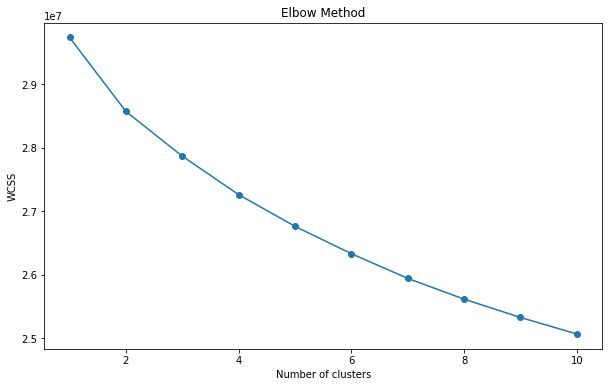

f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

KeyboardInterrupt: 

In [ ]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Applying K-Means with the chosen number of clusters
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
mnist['cluster'] = y_kmeans


f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


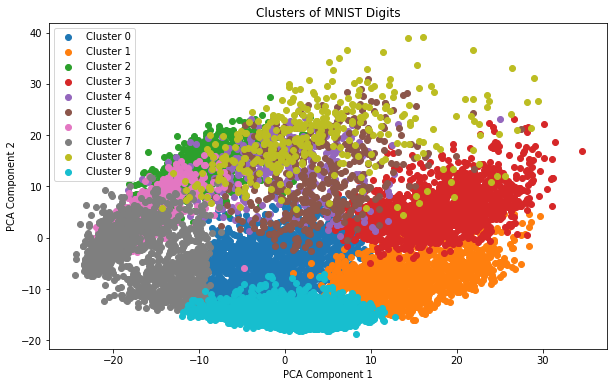

In [ ]:
# Visualize the clusters using the PCA reduced data
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=f'Cluster {i}')
plt.title('Clusters of MNIST Digits')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Cluster 0 has misclustered images:


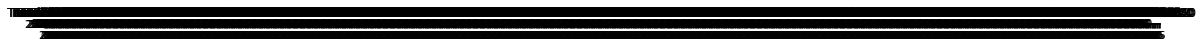

Cluster 1 has misclustered images:


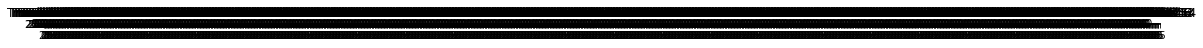

Cluster 2 has misclustered images:


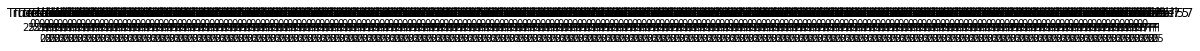

Cluster 3 has misclustered images:


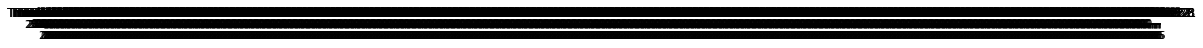

Cluster 4 has misclustered images:


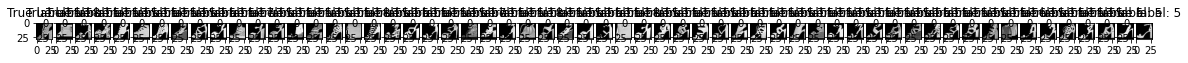

Cluster 5 has misclustered images:


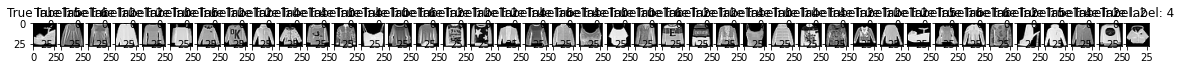

Cluster 6 has misclustered images:


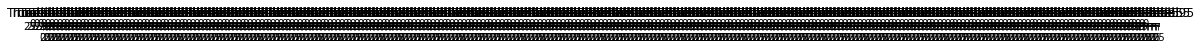

Cluster 7 has misclustered images:


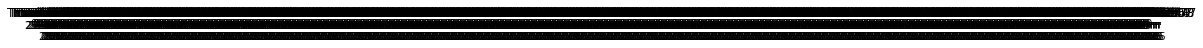

Cluster 8 has misclustered images:


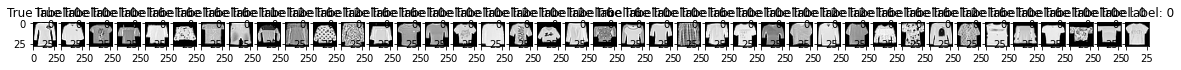

Cluster 9 has misclustered images:


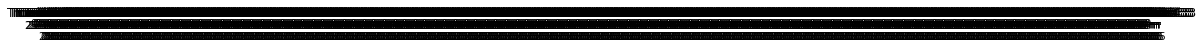

In [ ]:
# Investigate misclustered images
misclustered_examples = []
for i in range(optimal_clusters):
    cluster_indices = np.where(y_kmeans == i)[0]
    true_labels = y[cluster_indices]
    most_common_label = np.bincount(true_labels).argmax()
    misclustered = cluster_indices[true_labels != most_common_label]
    if len(misclustered) > 0:
        misclustered_examples.append((i, misclustered))

# Display misclustered images
for cluster, indices in misclustered_examples:
    print(f"Cluster {cluster} has misclustered images:")
    fig, axs = plt.subplots(1, len(indices), figsize=(20, 4))
    for i, idx in enumerate(indices):
        axs[i].imshow(X[idx].reshape(28, 28), cmap='gray')
        axs[i].set_title(f"True label: {y[idx]}")
    plt.show()
